АВЛ-дерево — это прежде всего двоичное дерево поиска, ключи которого удовлетворяют стандартному свойству: ключ любого узла дерева не меньше любого ключа в левом поддереве данного узла и не больше любого ключа в правом поддереве этого узла.

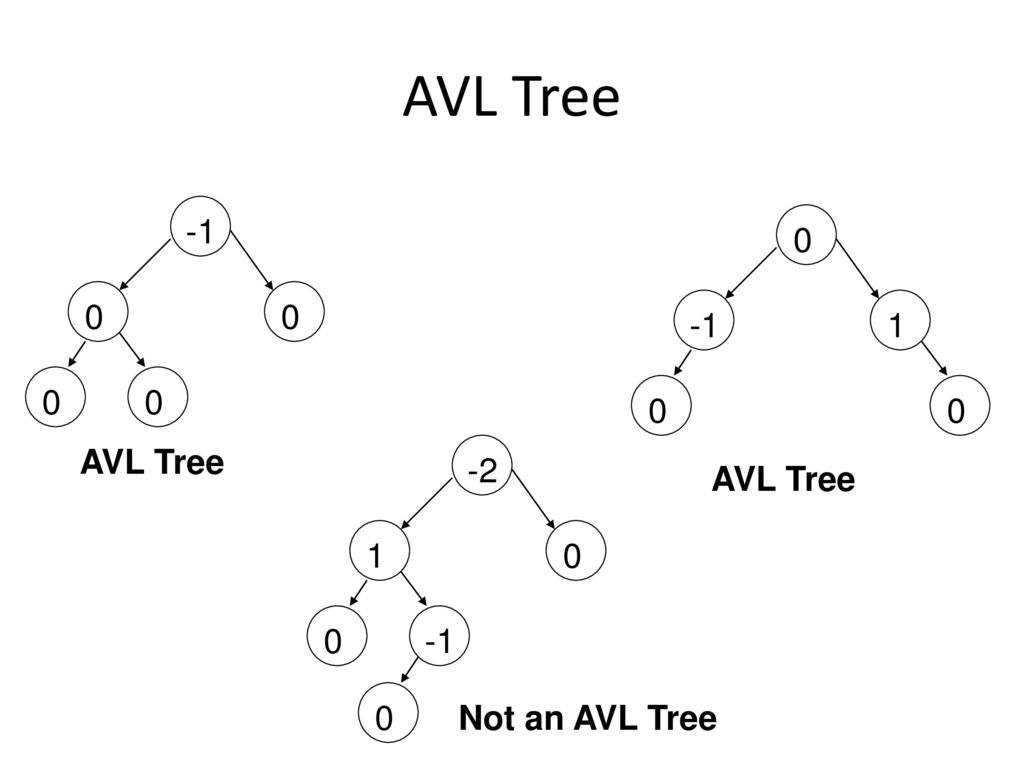

Дерево AVL обычно требует, чтобы высота левого и правого поддеревьев каждого узла отличалась не более чем на 1 (высота пустого дерева определяется как -1).

В дереве AVL высоты h минимальное количество узлов S (h) получается из S (h) = S (h-1) + S (h-2) +1, где S (0) = 1, S (1) = 2.

**1. Реализация дерева AVL**

In [2]:
class Node(object):
    def __init__(self,key):
        self.key=key
        # Левый и правый потомки:
        self.left=None
        self.right=None
        self.height=0 # начальное значение высоты узла

class AVLTree(object):
    def __init__(self):
        self.root=None # корень дерева

      # Метод для поиска узла с заданным ключом в дереве.
    def find(self,key):
      # Проверка - пусто ли дерево
        if self.root is None:
            return None
        else:
            return self._find(key,self.root)

      # Вспомогательный метод для рекурсивного поиска узла с заданным ключом в дереве
    def _find(self,key,node):
      # Проверка - является ли текущий узел пустым
        if node is None:
            return None
      # Проверка, находится ли ключ, который мы ищем, в левом поддереве текущего узла
        elif key < node.key:
            return self._find(key,self.left)
      # Проверка, находится ли ключ, который мы ищем, в правом поддереве текущего узла
        elif key > node.key:
            return self._find(key,self.right)
        else:
            return node # если найден ключ - возвращаем узел

        # Метод для поиска узла с минимальным ключом в дереве
    def findMin(self):
        if self.root is None:
            return None
        else:
            return self._findMin(self.root)
    def _findMin(self,node):
        if node.left:
            return self._findMin(node.left)
        else:
            return node
    def findMax(self):
        if self.root is None:
            return None
        else:
            return self._findMax(self.root)
    def _findMax(self,node):
        if node.right:
            return self._findMax(node.right)
        else:
            return node
    def height(self,node):
        if node is None:
            return -1
        else:
            return node.height

**2. Вставьте операцию дерева AVL**

Вставка узла может нарушить баланс дерева AVL, что может быть исправлено операцией вращения.

После вставки узла может быть изменен только баланс узлов на пути от вставленного узла к корневому узлу. Нам нужно найти первый узел, который нарушает условие равновесия, и назвать его K. Разница высот между двумя поддеревьями К равна 2.

Есть четыре случая дисбаланса:

1. Вставьте левое поддерево левого сына К один раз

2. Вставьте один раз в правое поддерево левого сына К.

3. Вставьте левое поддерево правого сына К.

4. Вставьте правильное поддерево правого сына К один раз

Корпуса 1 и 4 являются симметричными, требующими одной операции вращения, а ситуации очистки 2 и 3 требуют двойной операции вращения.

**Случай 1**

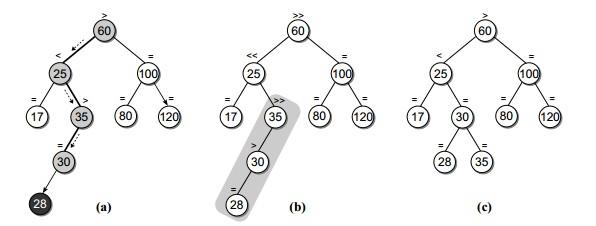

In [4]:
# Одиночный левый поворот в AVL-дереве

def singleLeftRotate(self,node):
        k1=node.left
        node.left=k1.right # Перемещение правого потомка k1 на место левого потомка node
        k1.right=node
        # Обновление высоты узла node как максимальной высоты его правого и левого поддеревьев + 1
        # Это нужно для правильного вычисления баланса узла после поворота
        node.height=max(self.height(node.right),self.height(node.left))+1
        #  Обновление высоты узла k1 как максимальной высоты его левого поддерева и высоты узла node + 1
        k1.height=max(self.height(k1.left),node.height)+1
        return k1

**Ситуация 4:**

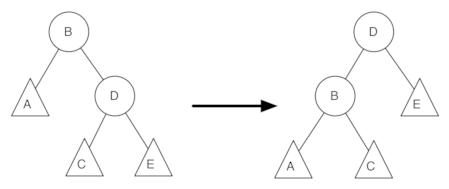

In [5]:
def singleRightRotate(self,node): # (по аналогии с предыдущим)
    k1=node.right
    node.right=k1.left
    k1.left=node
    node.height=max(self.height(node.right),self.height(node.left))+1
    k1.height=max(self.height(k1.right),node.height)+1
    return k1

**Случай 3:**

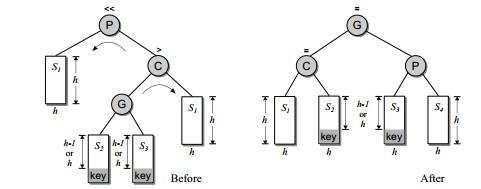

In [6]:
# Операция двойного правого поворота в AVL-дереве
def doubleRightRotate(self,node):
  # Выполняется одиночный левый поворот для правого поддерева узла node с использованием метода self.singleLeftRotate().
  # После этого левый потомок узла node становится новым корнем правого поддерева.
    node.right=self.singleLeftRotate(node.right)
    # Выполняется одиночный правый поворот для узла node с использованием метода self.singleRightRotate(). Этот одиночный правый поворот делается, чтобы завершить операцию двойного правого поворота.
    # После выполнения обеих операций узел node становится новым корнем поддерева.
    return self.singleRightRotate(node)

**Случай 2:**

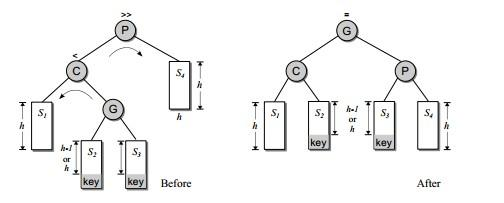

In [7]:
def doubleLeftRotate(self,node): #(по аналогии с предыдущим)
    node.left=self.singleRightRotate(node.left)
    return self.singleLeftRotate(node)

Серия операций вставки:

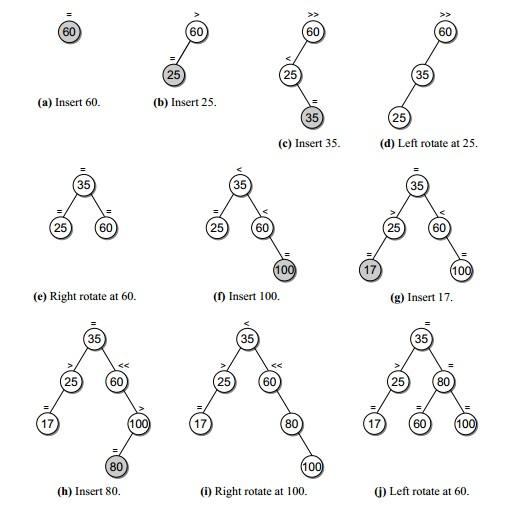

In [10]:
def put(self,key):
  #  Проверяется, существует ли корневой узел в дереве.
  #  Если корневой узел не существует (равен None), то создается новый узел с ключом key и он становится корневым узлом дерева
        if not self.root:
            self.root=Node(key)
        else:
            self.root=self._put(key,self.root)

            # Вспомогательный метод _put, который рекурсивно вставляет новый узел с ключом key в поддерево с корнем в узле node

            def _put(self,key,node):
              if node is None: # Если узел node равен None, создается новый узел с ключом key
                node=Node(key)
                #  Если ключ key меньше ключа текущего узла node, операция вставки продолжается в левое поддерево узла node. После вставки, проверяется, нарушено ли балансирование AVL-дерева в данном узле
                #  Если разница высот левого и правого поддеревьев равна 2, то выполняется одиночный или двойной левый поворот в зависимости от структуры поддерева
              elif key<node.key:
                node.left=self._put(key,node.left)
                if (self.height(node.left)-self.height(node.right))==2:
                  if key<node.left.key:
                    node=self.singleLeftRotate(node)
                  else:
                    node=self.doubleLeftRotate(node)

              elif key>node.key:
                node.right=self._put(key,node.right)
                if (self.height(node.right)-self.height(node.left))==2:
                  if key<node.right.key:
                    node=self.doubleRightRotate(node)
                  else:
                    node=self.singleRightRotate(node)

              node.height=max(self.height(node.right),self.height(node.left))+1
              return node


**3. Удалить операцию дерева AVL:**

1. Текущий узел - это узел, который нужно удалить, и это лист (без поддерева), удалите его напрямую, баланс текущего узла (Нет) не затронут.

2. Текущий узел - это узел, который нужно удалить, и есть только один левый или правый сын. Замените текущий узел левым или правым сыном. На баланс текущего узла это не влияет.

3. Текущий узел является узлом, подлежащим удалению, и существует правое поддерево левого поддерева: если высота правого поддерева высока, выберите наименьший узел из правого поддерева, присвойте его значение текущему узлу, а затем удалите наименьший узел правого поддерева. , Если высота левого поддерева велика, выберите самый большой узел из левого поддерева, присвойте его значение текущему узлу, а затем удалите самый большой узел левого поддерева. Таким образом, баланс текущего узла не будет разрушен.

4. Текущий узел не является узлом, подлежащим удалению, затем рекурсивно оперируйте левым или правым поддеревом. Состояние баланса текущего узла может быть разрушено, и требуется операция баланса.

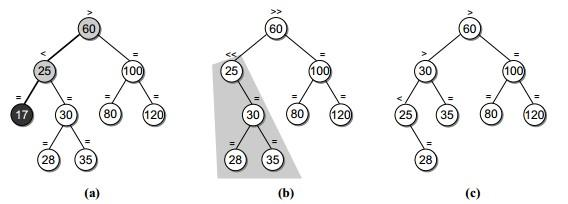

In [13]:
def delete(self,key):
        self.root=self.remove(key,self.root)

        #  Объявление приватного метода, который будет рекурсивно удалять узел с указанным ключом из поддерева с корнем node
        def remove(self,key,node):

          # Проверка, если текущий узел node пустой, т.е. дерево пусто, вызывается исключение KeyError
          if node is None:
            raise KeyError('Error, key not in tree')
          elif key<node.key: # рекурсивно вызывается метод remove для левого поддерева
            node.left=self.remove(key,node.left)
            if (self.height(node.right)-self.height(node.left))==2:
                if self.height(node.right.right)>=self.height(node.right.left):
                    node=self.singleRightRotate(node)
                else:
                    node=self.doubleRightRotate(node)
            node.height=max(self.height(node.left),self.height(node.right))+1


          elif key>node.key:
            node.right=self.remove(key,node.right)
            if (self.height(node.left)-self.height(node.right))==2:
                if self.height(node.left.left)>=self.height(node.left.right):
                    node=self.singleLeftRotate(node)
                else:
                    node=self.doubleLeftRotate(node)
            node.height=max(self.height(node.left),self.height(node.right))+1


        # Если у удаляемого узла есть оба потомка, то находим наименьший узел в правом поддереве или наибольший узел в левом поддереве и перемещаем его ключ в удаляемый узел
        # Затем вызываем remove для удаления найденного узла из его текущего местоположения
          elif node.left and node.right:
            if node.left.height<=node.right.height:
                minNode=self._findMin(node.right)
                node.key=minNode.key
                node.right=self.remove(node.key,node.right)
            else:
                maxNode=self._findMax(node.left)
                node.key=maxNode.key
                node.left=self.remove(node.key,node.left)
            node.height=max(self.height(node.left),self.height(node.right))+1

          # Если у удаляемого узла есть только один потомок или он листовой узел, просто перемещаем ссылку на его единственного потомка (если он есть) вместо него
          else:
            if node.right:
                node=node.right
            else:
                node=node.left

          return node